In [1]:
from utils import (
    load_data,
    train_model,
    evaluate_model,
)
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:
final_results = {}
for name in ["Sim", "Enhancer"]:
    for rule in ["and", "or", "add"]:
        for ind in tqdm(range(50)):
            for weight_scheme in ['depth', 'samplesize']:
                X, y, y_true = load_data(ind, name, rule)
                y_pred = train_model(X, y, weight_scheme=weight_scheme, bootstrap=True)
                result = evaluate_model(y_pred, y_true)
                final_results[(name, rule, ind, weight_scheme)] = result

100%|██████████| 50/50 [20:17<00:00, 24.34s/it]


In [3]:
final_results = {}
for name in ["Sim", "Enhancer"]:
    for rule in ["and", "or", "add"]:
        for ind in tqdm(range(50)):
            for weight_scheme in ['depth', 'samplesize']:
                X, y, y_true = load_data(ind, name, rule)
                y_pred = train_model(X, y, weight_scheme=weight_scheme)
                result = evaluate_model(y_pred, y_true)
                final_results[(name, rule, ind, weight_scheme)] = result

100%|██████████| 50/50 [20:10<00:00, 24.22s/it]


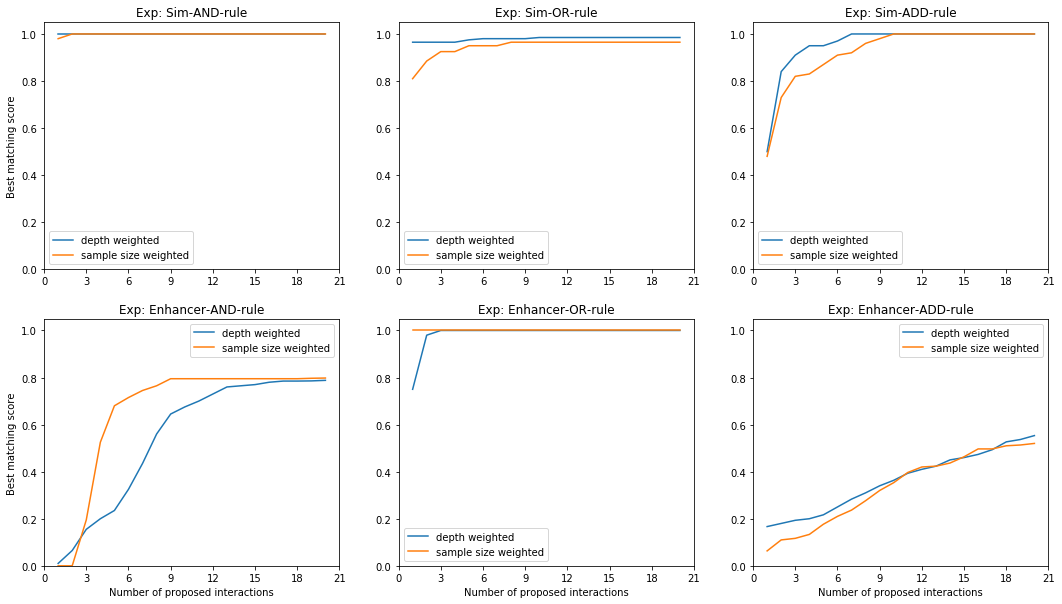

In [13]:
fig, axes = plt.subplots(2,3, figsize=(18,10), sharey=False)
for i, name in enumerate(["Sim", "Enhancer"]):
    for j, rule in enumerate(["and", "or", "add"]):
        try:
            ax = axes[i][j]
            min_length = np.min([len(v) for x, v in final_results.items() if x[0] == name and x[1] == rule])
            min_length = min(40, min_length)
            min_length = 20
            scores = []
            for x, v in final_results.items():
                if x[0] == name and x[1] == rule and x[-1] == 'depth':
                    if len(v) < min_length:
                        v = list(v) + [np.nan] * (min_length - len(v))
                    scores.append(v[:min_length])
            scores = np.array(scores)
            ax.errorbar(
                np.arange(1, min_length+1),
                np.nanmean(scores, axis=0),
                #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
            )
            scores = []
            for x, v in final_results.items():
                if x[0] == name and x[1] == rule and x[-1] == 'samplesize':
                    if len(v) < min_length:
                        v = list(v) + [np.nan] * (min_length - len(v))
                    scores.append(v[:min_length])
            scores = np.array(scores)
            ax.errorbar(
                np.arange(1, min_length+1),
                np.nanmean(scores, axis=0),
                #yerr = np.std(np.array([list(v)[:min_length] for x, v in final_results.items() if x[0] == name and x[1] == rule]), axis=0) / 50 ** .5,
            )
            ax.set_ylim([0,1.05])
            ax.set_xlim([0, 21])
            ax.legend(['depth weighted', 'sample size weighted'])
            ax.set_title("Exp: " + name + "-" + rule.upper() + "-rule")
            ax.xaxis.set_major_locator(MaxNLocator(integer=True))
            if (i == 0 and j == 0) or (i == 1 and j == 0):
                ax.set_ylabel("Best matching score")
            if (i == 1):
                ax.set_xlabel("Number of proposed interactions")
        except:
            pass

Given a true interaction $S^*$ and $K$ proposed interactions $\hat S_1, \ldots, \hat S_K$, we define the best matching score to be:

\begin{align}
\mathrm{best\ matching\ score} = \max_{j=1}^K \frac{|S_j|}{|S^*|} \mathbf{1}(S_j\subset S^*).
\end{align}
Clearly, this score is monotonically increasing with respect to $K$. 

In [5]:
## save the result
import pickle
with open("result_" + "whole_with_bootstrap" + ".pickle", 'wb') as f:
    pickle.dump(final_results, f)

In [12]:
import pickle
with open("result_whole_with_bootstrap.pickle", 'rb') as f:
    final_results = pickle.load(f)